In [1]:
import pandas as pd
import datetime
import numpy as np

In [2]:
orders=pd.read_csv("D:/从c盘转移的桌面/github/RFM Analysis Python Project/orders.csv",index_col=0)
orders.dropna(inplace=True)

In [3]:
orders['values']=1

In [4]:
purchase_list=orders.pivot_table(index=['clientId','orderId','gender','orderdate'],columns='product',aggfunc=sum,values='values').fillna(0)
purchase_list

product                             banana  milk  water
clientId orderId gender orderdate                      
1        56.0    男性     2017-04-03     0.0   2.0    2.0
         112.0   男性     2017-02-23     0.0   2.0    2.0
         267.0   男性     2017-02-26     1.0   0.0    0.0
         657.0   男性     2017-03-25     0.0   2.0    4.0
         819.0   男性     2017-03-17     1.0   2.0    3.0
...                                    ...   ...    ...
298      532.0   女性     2017-03-21     0.0   2.0    1.0
         605.0   女性     2017-02-27     0.0   1.0    3.0
299      709.0   女性     2017-01-27     0.0   0.0    2.0
300      104.0   男性     2017-01-07     1.0   2.0    5.0
         245.0   男性     2017-02-03     0.0   0.0    1.0

[987 rows x 3 columns]

In [5]:
purchase_list=purchase_list.reset_index()
purchase_list

product,clientId,orderId,gender,orderdate,banana,milk,water
0,1,56.0,男性,2017-04-03,0.0,2.0,2.0
1,1,112.0,男性,2017-02-23,0.0,2.0,2.0
2,1,267.0,男性,2017-02-26,1.0,0.0,0.0
3,1,657.0,男性,2017-03-25,0.0,2.0,4.0
4,1,819.0,男性,2017-03-17,1.0,2.0,3.0
...,...,...,...,...,...,...,...
982,298,532.0,女性,2017-03-21,0.0,2.0,1.0
983,298,605.0,女性,2017-02-27,0.0,1.0,3.0
984,299,709.0,女性,2017-01-27,0.0,0.0,2.0
985,300,104.0,男性,2017-01-07,1.0,2.0,5.0


In [6]:
purchase_list['frequency']=1
frequency=purchase_list.groupby('clientId',as_index=False)['frequency'].sum()
#frequency count each customer total spending times

In [7]:
del purchase_list['frequency']
theToday=datetime.datetime.strptime(orders['orderdate'].max(),'%Y-%m-%d')
#getting today date

In [8]:
purchase_list['orderdate']=pd.to_datetime(purchase_list['orderdate'])
recent_recency=purchase_list.groupby('clientId',as_index=False)['orderdate'].max()
#recent_recency is the last spending time for each customers

In [9]:
recent_recency['recency']=(theToday-recent_recency['orderdate']).astype(str)
#we want the time period between the last time and today

In [10]:
recent_recency['recency']=recent_recency['recency'].str.replace('days.*','',regex=True)
#delete  recent_recency time smaller than day

In [11]:
recent_recency['recency']=recent_recency['recency'].astype(int)

In [12]:
purchase_list=recent_recency.merge(purchase_list,on=['clientId','orderdate'],how='inner')
purchase_list=purchase_list.merge(frequency,on=['clientId'],how='inner')
purchase_list

product,clientId,orderdate,recency,orderId,gender,banana,milk,water,frequency
0,1,2017-04-03,8,56.0,男性,0.0,2.0,2.0,5
1,2,2017-03-31,11,385.0,男性,0.0,1.0,4.0,1
2,3,2017-04-10,1,343.0,女性,1.0,0.0,0.0,6
3,4,2017-02-01,69,131.0,女性,1.0,1.0,2.0,1
4,5,2017-03-26,16,538.0,男性,0.0,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...
292,296,2017-03-13,29,714.0,男性,0.0,2.0,1.0,4
293,297,2017-04-08,3,275.0,女性,1.0,1.0,4.0,2
294,298,2017-03-21,21,532.0,女性,0.0,2.0,1.0,4
295,299,2017-01-27,74,709.0,女性,0.0,0.0,2.0,1


In [13]:
recency_label=['0-7 day','8-15 day','16-22 day','23-30 day','31-55 day','>55 day']
frequency_label=['1 freq','2 freq','3 freq','4 freq','5 freq','>5 freq']

In [14]:
recency_cut=[-1,7,15,22,30,55,purchase_list['recency'].max()]
frequency_cut=[0,1,2,3,4,5,purchase_list['frequency'].max()]

In [15]:
purchase_list['recency_cate']=pd.cut(purchase_list['recency'],bins=recency_cut,labels=recency_label)
purchase_list

product,clientId,orderdate,recency,orderId,gender,banana,milk,water,frequency,recency_cate
0,1,2017-04-03,8,56.0,男性,0.0,2.0,2.0,5,8-15 day
1,2,2017-03-31,11,385.0,男性,0.0,1.0,4.0,1,8-15 day
2,3,2017-04-10,1,343.0,女性,1.0,0.0,0.0,6,0-7 day
3,4,2017-02-01,69,131.0,女性,1.0,1.0,2.0,1,>55 day
4,5,2017-03-26,16,538.0,男性,0.0,1.0,0.0,4,16-22 day
...,...,...,...,...,...,...,...,...,...,...
292,296,2017-03-13,29,714.0,男性,0.0,2.0,1.0,4,23-30 day
293,297,2017-04-08,3,275.0,女性,1.0,1.0,4.0,2,0-7 day
294,298,2017-03-21,21,532.0,女性,0.0,2.0,1.0,4,16-22 day
295,299,2017-01-27,74,709.0,女性,0.0,0.0,2.0,1,>55 day


In [16]:
purchase_list['frequency_cate']=pd.cut(purchase_list['frequency'],bins=frequency_cut,labels=frequency_label)

In [17]:
RF_table=pd.crosstab(purchase_list['frequency_cate'].astype(str),purchase_list['recency_cate'].astype(str))
RF_table

recency_cate,0-7 day,16-22 day,23-30 day,31-55 day,8-15 day,>55 day
frequency_cate,,,,,,
1 freq,4,3,3,9,4,21
2 freq,11,7,10,13,6,7
3 freq,15,9,9,18,10,4
4 freq,15,15,9,6,12,2
5 freq,17,5,2,10,5,0
>5 freq,15,5,1,5,10,0


In [18]:
RF_table['freq']=RF_table.index
RF_table.sort_values('freq',ascending=False)
RF_table

recency_cate,0-7 day,16-22 day,23-30 day,31-55 day,8-15 day,>55 day,freq
frequency_cate,,,,,,,
1 freq,4,3,3,9,4,21,1 freq
2 freq,11,7,10,13,6,7,2 freq
3 freq,15,9,9,18,10,4,3 freq
4 freq,15,15,9,6,12,2,4 freq
5 freq,17,5,2,10,5,0,5 freq
>5 freq,15,5,1,5,10,0,>5 freq


In [19]:
collist=['freq']+recency_label
collist

['freq',
 '0-7 day',
 '8-15 day',
 '16-22 day',
 '23-30 day',
 '31-55 day',
 '>55 day']

In [20]:
RF_table=RF_table[collist]
print(RF_table)

recency_cate       freq  0-7 day  8-15 day  16-22 day  23-30 day  31-55 day  \
frequency_cate                                                                
1 freq           1 freq        4         4          3          3          9   
2 freq           2 freq       11         6          7         10         13   
3 freq           3 freq       15        10          9          9         18   
4 freq           4 freq       15        12         15          9          6   
5 freq           5 freq       17         5          5          2         10   
>5 freq         >5 freq       15        10          5          1          5   

recency_cate    >55 day  
frequency_cate           
1 freq               21  
2 freq                7  
3 freq                4  
4 freq                2  
5 freq                0  
>5 freq               0  


In [21]:
purchase_list['customer'] = np.where( (purchase_list['frequency'] >=frequency_cut[4]) & (purchase_list['recency']<=recency_cut[3]), 'Loyal customers',
                     np.where( (purchase_list['frequency'] >=frequency_cut[4]) & ( purchase_list['recency']>recency_cut[3]), 'Inactive customers',
                              np.where( (purchase_list['frequency'] < frequency_cut[4]) & ( purchase_list['recency']>recency_cut[3]), 'Lost customers',
                                       'New customers'  )))

purchase_list['customer'].value_counts()

Loyal customers       99
Lost customers        94
New customers         69
Inactive customers    35
Name: customer, dtype: int64

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False,
     'figure.figsize':(10,8)}
sns.set(context='notebook',style='ticks',rc=rc)

recency_label =  ['0-7 day', '8-15 day', '16-22 day', '23-30 day', '31-55 day', '>55 day']
frequency_label =  ['1 freq', '2 freq', '3 freq', '4 freq', '5 freq', '>5 freq']

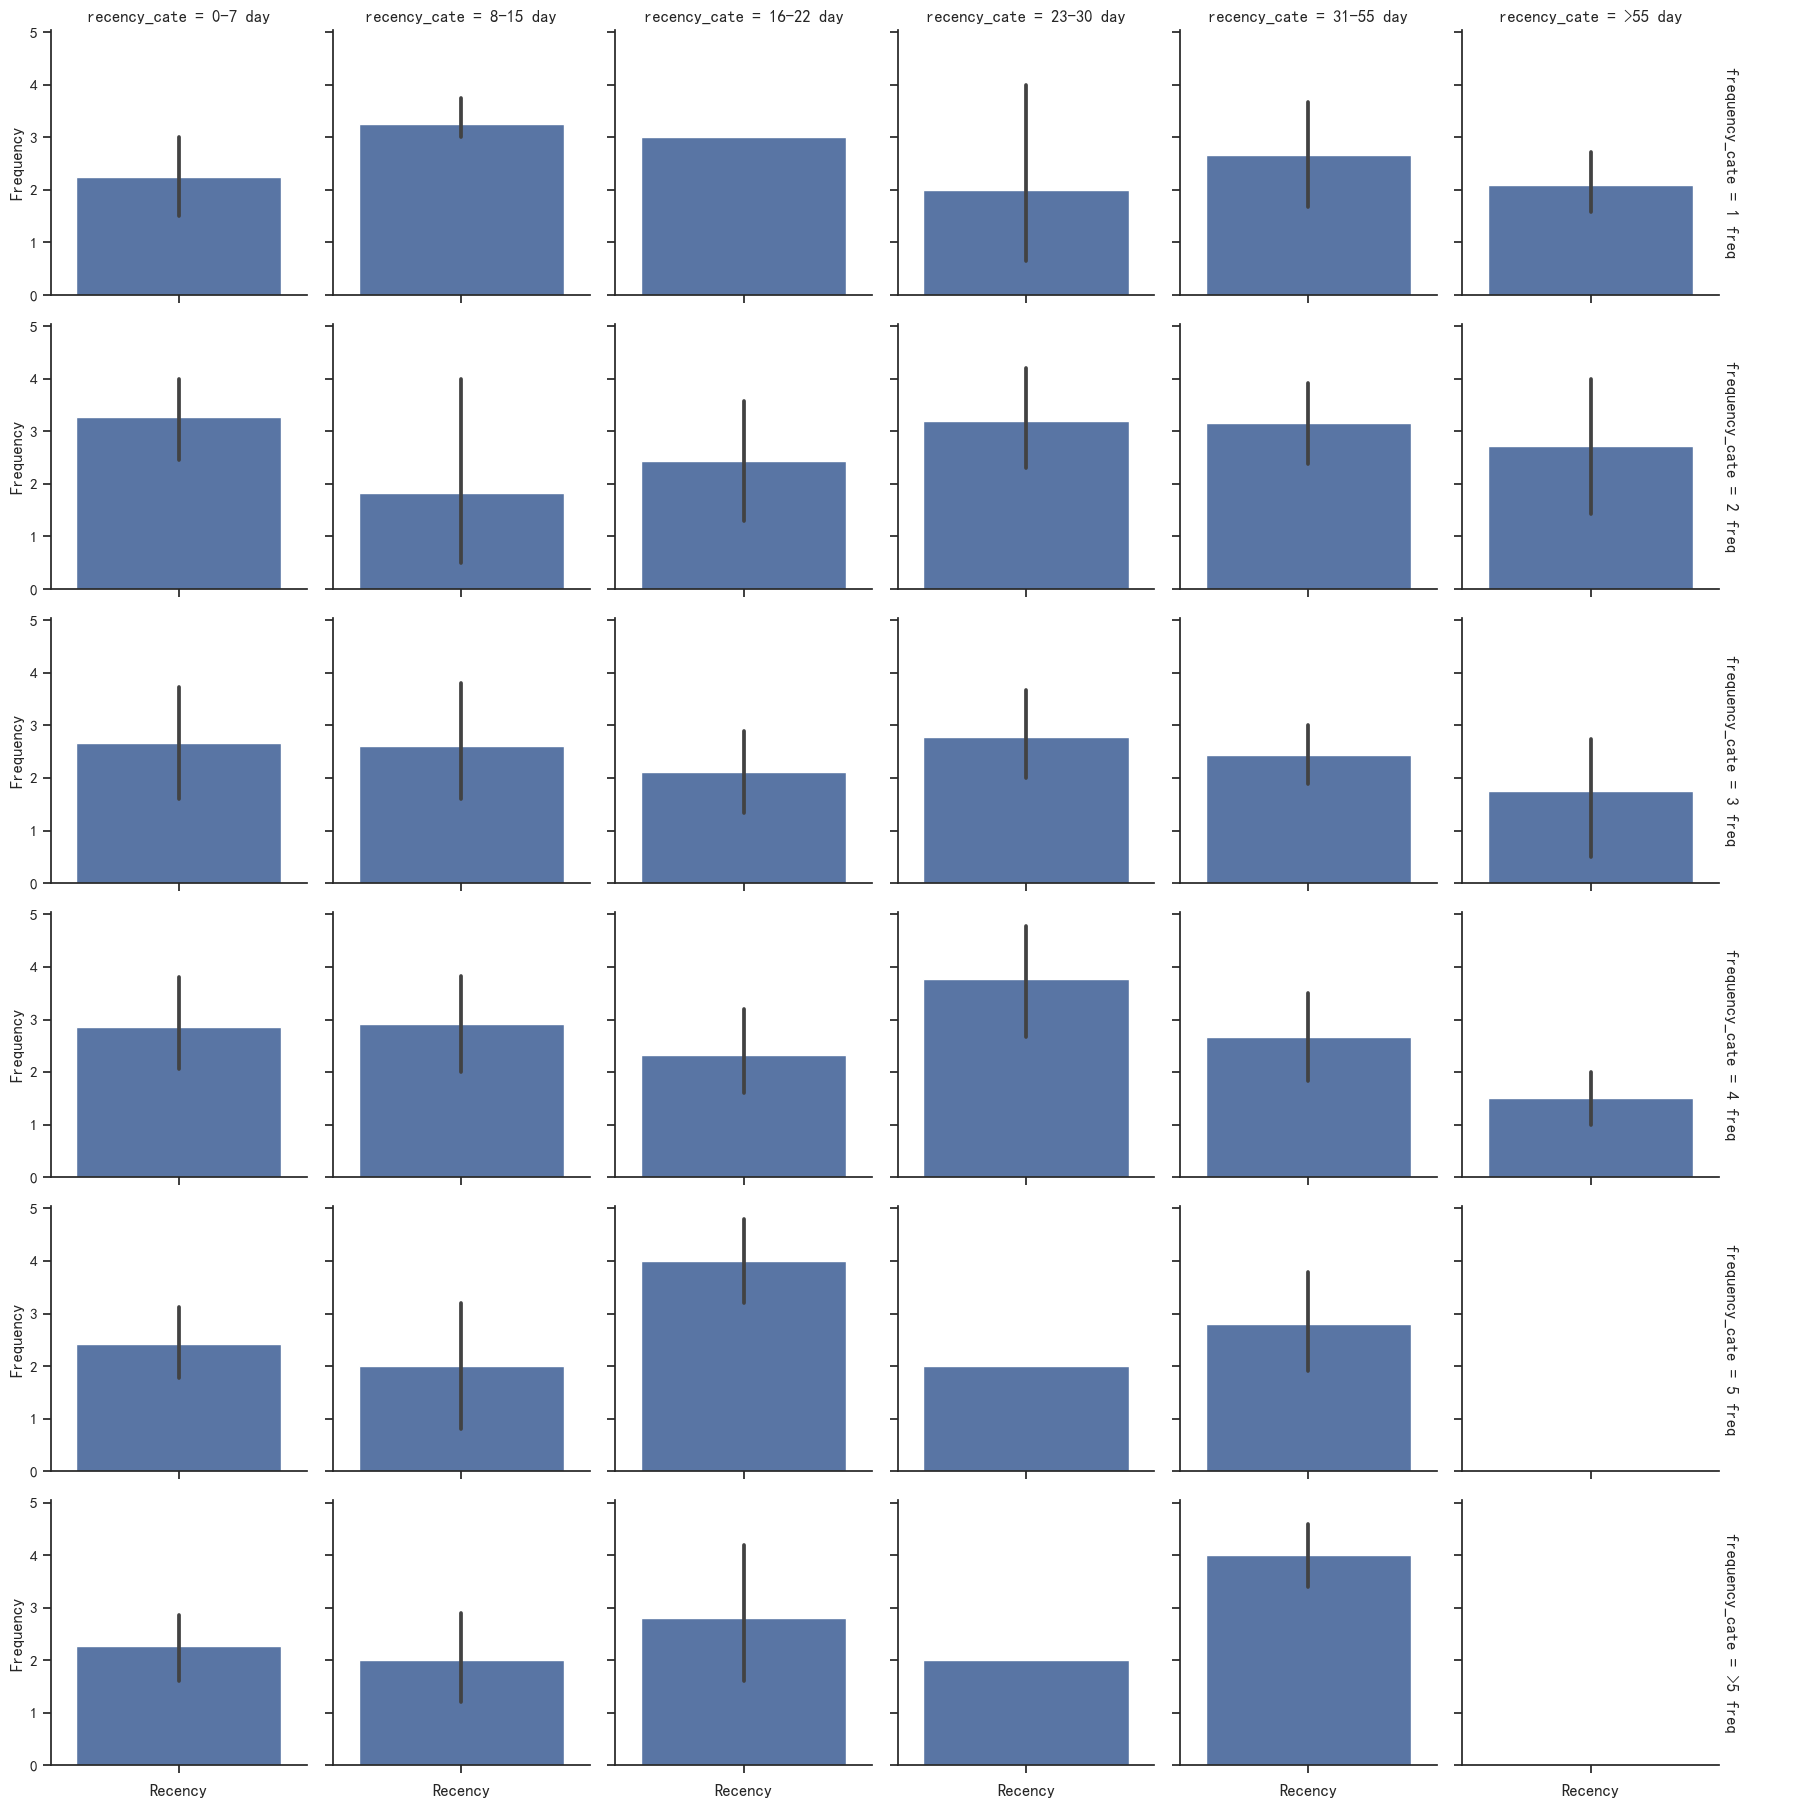

In [23]:
g = sns.FacetGrid(purchase_list,  # Data source
                  col="recency_cate",  # X-axis data source
                  row="frequency_cate",  # Y-axis data source
                  col_order=recency_label,  # X-axis data order
                  row_order=frequency_label,  # Y-axis data order
                  palette='Set1',  # Color palette for the plot
                  margin_titles=True)  # Display titles with margins

g = g.map_dataframe(sns.barplot, y='water')  # Create bar plots using 'Water' data for each subplot
g = g.set_axis_labels('Recency', 'Frequency').add_legend()  # Set axis labels and add legend


In [24]:
temp=purchase_list.drop(columns=['orderId','orderdate','recency','frequency'])
temp

product,clientId,gender,banana,milk,water,recency_cate,frequency_cate,customer
0,1,男性,0.0,2.0,2.0,8-15 day,5 freq,Loyal customers
1,2,男性,0.0,1.0,4.0,8-15 day,1 freq,New customers
2,3,女性,1.0,0.0,0.0,0-7 day,>5 freq,Loyal customers
3,4,女性,1.0,1.0,2.0,>55 day,1 freq,Lost customers
4,5,男性,0.0,1.0,0.0,16-22 day,4 freq,Loyal customers
...,...,...,...,...,...,...,...,...
292,296,男性,0.0,2.0,1.0,23-30 day,4 freq,Inactive customers
293,297,女性,1.0,1.0,4.0,0-7 day,2 freq,New customers
294,298,女性,0.0,2.0,1.0,16-22 day,4 freq,Loyal customers
295,299,女性,0.0,0.0,2.0,>55 day,1 freq,Lost customers


In [25]:
df3=pd.melt(temp,id_vars=['clientId','customer','recency_cate','frequency_cate','gender'], var_name='types',value_name='values')
df3

,clientId,customer,recency_cate,frequency_cate,gender,types,values
0,1,Loyal customers,8-15 day,5 freq,男性,banana,0.0
1,2,New customers,8-15 day,1 freq,男性,banana,0.0
2,3,Loyal customers,0-7 day,>5 freq,女性,banana,1.0
3,4,Lost customers,>55 day,1 freq,女性,banana,1.0
4,5,Loyal customers,16-22 day,4 freq,男性,banana,0.0
...,...,...,...,...,...,...,...
886,296,Inactive customers,23-30 day,4 freq,男性,water,1.0
887,297,New customers,0-7 day,2 freq,女性,water,4.0
888,298,Loyal customers,16-22 day,4 freq,女性,water,1.0
889,299,Lost customers,>55 day,1 freq,女性,water,2.0


In [26]:
df3['values']=pd.to_numeric(df3['values'],errors='coerce')
df3=df3.dropna()

In [27]:
data=df3[(df3['recency_cate']=='0-7 day')&(df3['frequency_cate']=='>5 freq')]
data=data[['gender','types','values']].groupby(['types','gender']).sum()
data

values
types  gender        
banana 女性         2.0
       男性         7.0
milk   女性         5.0
       男性         8.0
water  女性         7.0
       男性        27.0

In [28]:
data=data.groupby(level=1).apply(lambda x:100*x/float(x.sum()))
data

values
types  gender           
banana 女性      14.285714
       男性      16.666667
milk   女性      35.714286
       男性      19.047619
water  女性      50.000000
       男性      64.285714

In [29]:
import warnings
warnings.filterwarnings('ignore')

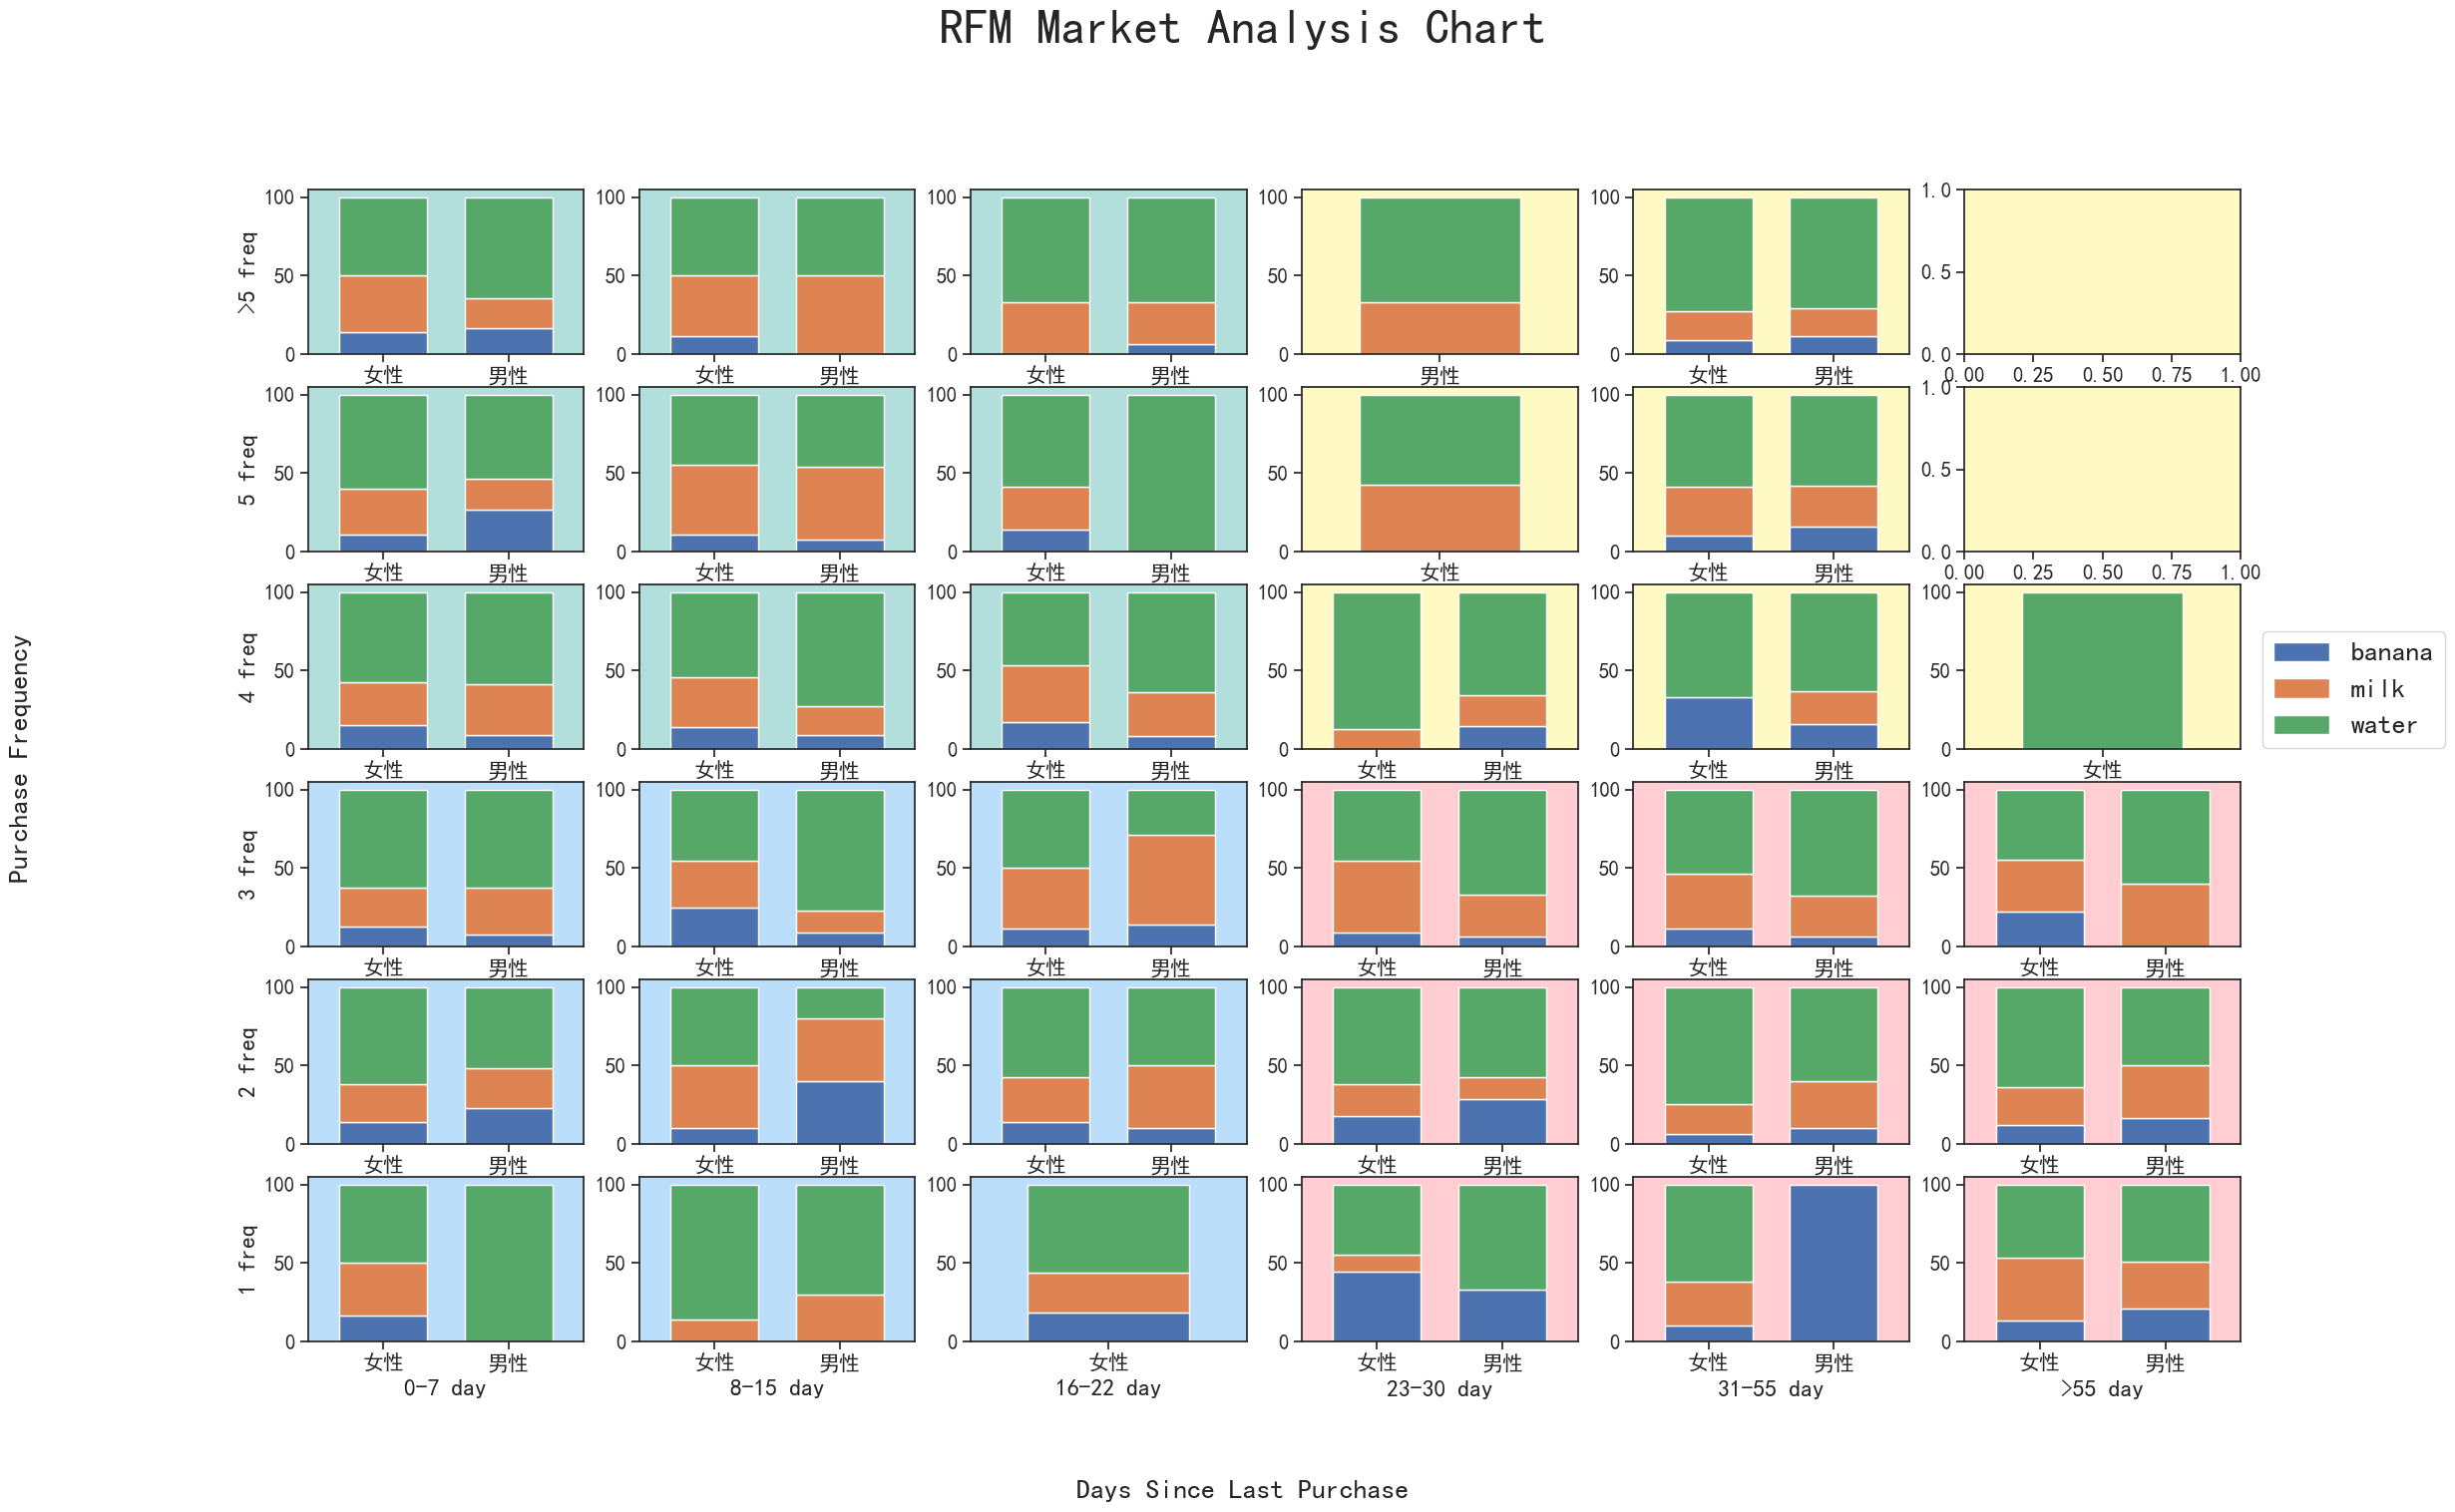

In [30]:
fig, axes = plt.subplots(6, 6, figsize=(25, 15))
countX = 0  # Canvas X-coordinate
for i in frequency_label[::-1]:  # Our inner small plots are drawn from top to bottom, so we need to reverse the list to draw groups with frequency > 5 first
    countY = 0  # Canvas Y-coordinate
    for j in recency_label:  # Recency
        data = df3[(df3['recency_cate'] == j) & (df3['frequency_cate'] == i)]
        if data.shape[0] != 0:  # Check if this section has any data
            # Handling stacked data, converting the purchase quantity to percentage
            data = data[['gender', 'types', 'values']].groupby(['types', 'gender']).sum()
            data = data.groupby(level=1).apply(lambda x: 100 * x / float(x.sum()))  # Convert to percentage
            data = data.add_suffix('').reset_index()  # Flatten multiIndex
            data = data.pivot('gender', 'types', 'values')  # Pivot table

            # Set up individual small chart
            ax = data.plot.bar(stacked=True,  # Set stacked bar chart
                               width=0.7,  # Width of the bars
                               legend=False,
                               ax=axes[countX, countY],  # Position of the small chart
                               rot=0)  # Rotation of axis labels

        ################ Set Legends ################
        if (i == '4 freq') and (j == '>55 day'):
            ax.legend(bbox_to_anchor=(1.03, 0.8), loc=2, fontsize=20)  # Set legends

        ################ Draw X-labels ################
        if i == '1 freq':
            axes[countX][countY].set_xlabel(j, fontsize=17)

        ############### Draw Y-labels ################
        if j == '0-7 day':
            axes[countX][countY].set_ylabel(frequency_label[::-1][countX], fontsize=17)
        else:
            axes[countX][countY].set_ylabel('')

        ################ Enlarge labels for Water, Milk, Banana ################
        axes[countX][countY].tick_params(labelsize=15)

        ############### Color the four quadrants ################
        if countY > 2 and countX > 2:
            axes[countX][countY].set(facecolor="#ffcdd2")  # Red color
        elif countY > 2 and countX < 3:
            axes[countX][countY].set(facecolor="#FFF9C4")  # Yellow color
        elif countY < 3 and countX > 2:
            axes[countX][countY].set(facecolor="#BBDEFB")  # Blue color
        else:
            axes[countX][countY].set(facecolor="#B2DFDB")  # Green color

        countY += 1
    countX += 1
fig.suptitle('RFM Market Analysis Chart', position=(.5, 1), fontsize=35)  # Title
fig.text(0.5, 0.01, 'Days Since Last Purchase', ha='center', va='center', fontsize=20)  # X-axis title
fig.text(0.01, 0.5, 'Purchase Frequency', ha='center', va='center', rotation='vertical', fontsize=20)  # Y-axis title
fig.show()
